In [10]:
#Deep learning on Iris data
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [13]:
#Vis imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#print(iris["DESCR"])

In [12]:
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\Ruthberg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


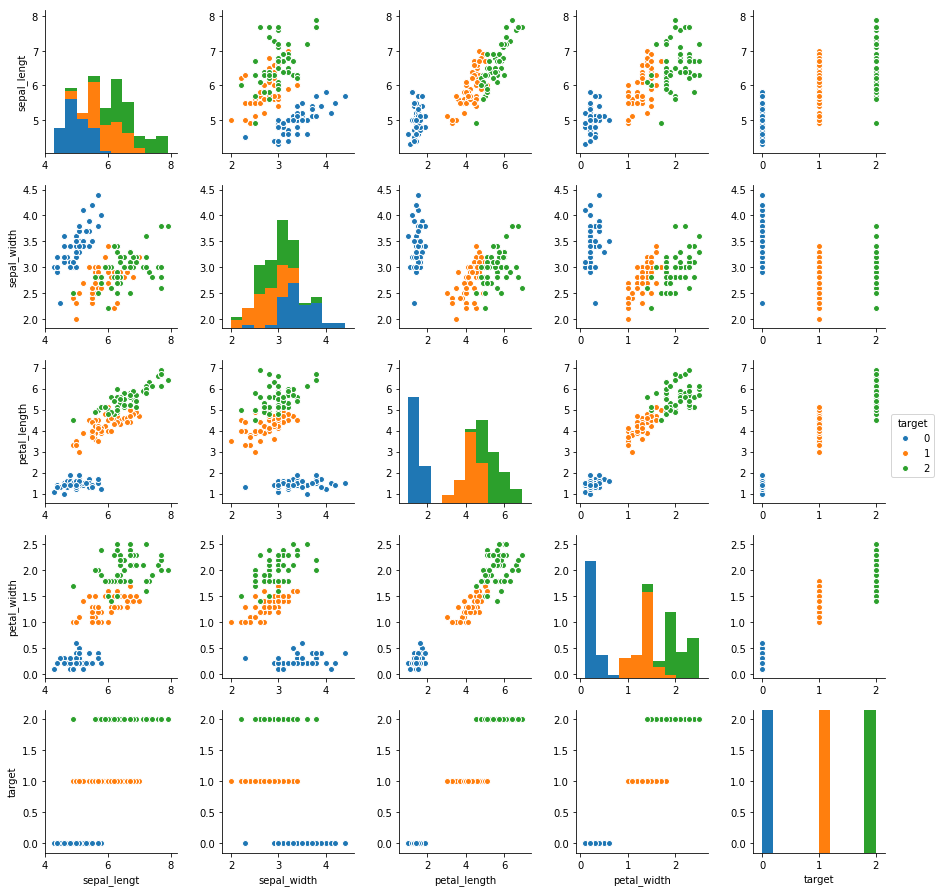

In [16]:
#Explore data a bit
df.columns = ["sepal_lengt","sepal_width","petal_length","petal_width"]
df2 = df.iloc[:,0:4]
df2["target"] = iris["target"]
df2.head()
sns.pairplot(df2,hue="target")

In [18]:
#Add target column
df["target"] = iris["target"]

In [21]:
df["target"] = df["target"].apply(int)
df.head()

,sepal_lengt,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
#Test split data
from sklearn.cross_validation import train_test_split
y = df["target"]
X = df.drop("target",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

C:\Users\Ruthberg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
#Start TF modeling
import tensorflow as tf

In [29]:
#Feature columns
X.columns

Index(['sepal_lengt', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [30]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [31]:
feat_cols

[_NumericColumn(key='sepal_lengt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [32]:
#Estimator and train
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=5, shuffle=True)

In [33]:
classifier = tf.estimator.DNNClassifier(hidden_units = [10,20,10], n_classes=3,feature_columns=feat_cols) #3 layers with different number of neurons

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Ruthberg\\AppData\\Local\\Temp\\tmpvvp7hycc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024EFCD4DEB8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
classifier.train(input_fn=input_func,steps=50)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Ruthberg\AppData\Local\Temp\tmpvvp7hycc\model.ckpt.
INFO:tensorflow:loss = 12.2004, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\Ruthberg\AppData\Local\Temp\tmpvvp7hycc\model.ckpt.
INFO:tensorflow:Loss for final step: 4.51981.


In [35]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [36]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Restoring parameters from C:\Users\Ruthberg\AppData\Local\Temp\tmpvvp7hycc\model.ckpt-50


In [37]:
predictions

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logits': array([ 5.27389479, -0.62337118, -1.97129762], dtype=float32),
  'probabilities': array([  9.96551394e-01,   2.73747160e-03,   7.11135799e-04], dtype=float32)},
 {'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'logits': array([-3.38253593,  0.7422483 ,  1.59824526], dtype=float32),
  'probabilities': array([ 0.00479749,  0.29674587,  0.69845665], dtype=float32)},
 {'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'logits': array([-4.73001289,  0.58919448,  2.59854484], dtype=float32),
  'probabilities': array([  5.78567851e-04,   1.18156299e-01,   8.81265163e-01], dtype=float32)},
 {'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object),
  'logits': array([-4.00748682,  0.57541078,  2.14255357], dtype=float32),
  'probabilities': array([ 0.00176201,  0.17231993,  0.82591808], dtype=float32)},
 {'class_i

In [38]:
#Get predictions from model
final_preds = []
for pred in predictions:
    final_preds.append(pred["class_ids"][0])

In [39]:
#Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test,final_preds))
print("\nClassification report: ")
print(classification_report(y_test,final_preds))

Confusion matrix: 
[[17  0  0]
 [ 0  0 14]
 [ 0  0 14]]

Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.00      0.00      0.00        14
          2       0.50      1.00      0.67        14

avg / total       0.53      0.69      0.59        45



C:\Users\Ruthberg\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
